## Overview

In this tutorial, we will work through a time series forecasting project from end-to-end, from
downloading the dataset and defining the problem to training a final model and making
predictions.
The steps of this project that we will work through are as follows:
1. Problem Description.
2. Persistence.
3. Data Analysis.
4. ARIMA Models.
5. Model Validation.


In [1]:
#import libraries
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt

## Problem Description

In [2]:
series = read_csv("DailyDelhiClimateTest.csv",header = 0,index_col=0,parse_dates = True,squeeze=True)

C:\Users\DELL Abdellah\AppData\Local\Temp\ipykernel_16232\823379247.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv("DailyDelhiClimateTest.csv",header = 0,index_col=0,parse_dates = True,squeeze=True)


In [3]:
print(series)

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333
...               ...        ...         ...           ...
2017-04-20  34.500000  27.500000    5.562500    998.625000
2017-04-21  34.250000  39.375000    6.962500    999.875000
2017-04-22  32.900000  40.900000    8.890000   1001.600000
2017-04-23  32.875000  27.500000    9.962500   1002.125000
2017-04-24  32.000000  27.142857   12.157143   1004.142857

[114 rows x 4 columns]


In this tutorial, we are gonna build an ARIMA model to predict the future <b>Temperature</b> values of Delhi city using python.This dataset provides data from 1st January 2013 to 24th April 2017 in the city of Delhi, India. The 4 parameters here are:
meantemp, humidity, wind_speed, meanpressure.

In [4]:
series=series.drop(['humidity','wind_speed','meanpressure'], axis=1)

In [5]:
series

,meantemp
date,
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


In [6]:
#remove missing values
series=series.dropna()

## Persistence

In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#prepare data
X=series.values
train_size = int(len(X)*0.5)
train, X_ = X[0:train_size], X[train_size:]
test_size = int(len(X_)*0.5)
valid, test = X_[0:test_size], X_[test_size:]

In [9]:
#walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(valid)):
    #predict
    yhat = history[-1]
    predictions.append(yhat)
    #observation
    obs = valid[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))


>Predicted=18.750, Expected=19.875
>Predicted=19.875, Expected=23.333
>Predicted=23.333, Expected=24.462
>Predicted=24.462, Expected=23.750
>Predicted=23.750, Expected=20.500
>Predicted=20.500, Expected=19.125
>Predicted=19.125, Expected=19.750
>Predicted=19.750, Expected=20.000
>Predicted=20.000, Expected=22.625
>Predicted=22.625, Expected=21.545
>Predicted=21.545, Expected=20.786
>Predicted=20.786, Expected=19.938
>Predicted=19.938, Expected=18.533
>Predicted=18.533, Expected=17.375
>Predicted=17.375, Expected=17.444
>Predicted=17.444, Expected=18.000
>Predicted=18.000, Expected=19.875
>Predicted=19.875, Expected=24.000
>Predicted=24.000, Expected=20.900
>Predicted=20.900, Expected=24.692
>Predicted=24.692, Expected=24.667
>Predicted=24.667, Expected=23.333
>Predicted=23.333, Expected=25.000
>Predicted=25.000, Expected=27.250
>Predicted=27.250, Expected=28.000
>Predicted=28.000, Expected=28.917
>Predicted=28.917, Expected=26.500
>Predicted=26.500, Expected=29.100


In [10]:
# report performance
rmse = sqrt(mean_squared_error(valid, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 1.973


## Data Analysis

#### 1. Summary Statistics

In [11]:
print(series.describe())

         meantemp
count  114.000000
mean    21.713079
std      6.360072
min     11.000000
25%     16.437198
50%     19.875000
75%     27.705357
max     34.500000


#### 2. Line plot

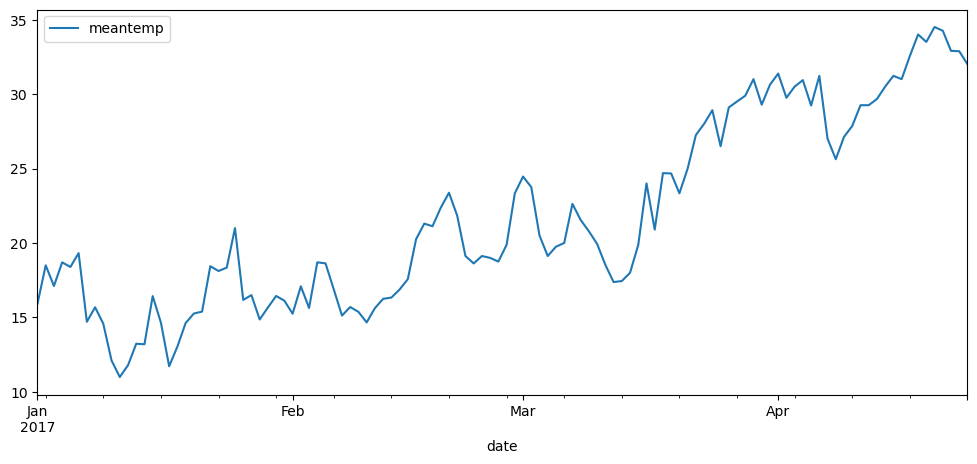

In [12]:
series.plot(figsize=(12,5))
plt.show()

- There is an increasing trend of meantemp over time.
- The trend means the dataset is almost certainly non-stationary and the apparent change in fluctuation may also contribute.
- These simple observations suggest we may see benefit in modeling the trend and removing it from the time series. Alternately, we could use differencing to make the series stationary for modeling. We may even need two levels of differencing if there is a growth trend in the fluctuations in later years.

#### 3. Density Plot

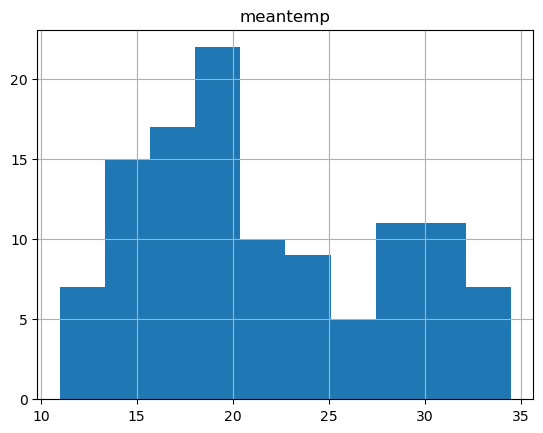

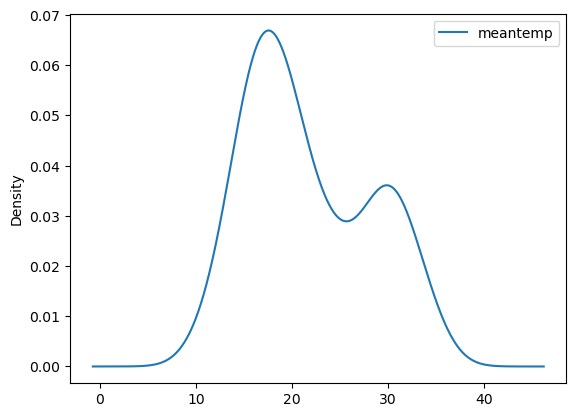

In [13]:
series.hist()

series.plot(kind='kde')
plt.show()


- The distrubution is not Gaussian

#### 4. Checking Stationarity

Right off the bat, we can see that it seems to have somewhat of a constant mean around 45. And the fluctuations also seem to be more or less the same. However to be sure if the data is stationary or not, we run Dickey Fuller Test.


In [14]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(series)

1. ADF :  -1.0964742758756196
2. P-Value :  0.7164758731775929
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 113
5. Critical Values :
	 1% :  -3.489589552580676
	 5% :  -2.887477210140433
	 10% :  -2.580604145195395


p-value > 0.05 donc échec de rejet de l'hypothèse nulle (H0), la série est <b>non stationnaire</b>.

## ARIMA Models

#### 1. Manually Configured ARIMA

The time series is non-stationary. <b>We can make it stationary by first differencing the series</b> and using a statistical test to confirm that the result is stationary.

In [15]:
# create a differenced time series
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i-1]
        diff.append(value)
    return pd.Series(diff)

#difference data
stationary = difference(X)
stationary.index = series.index[1:]

# check if stationary
ad_test(stationary)

1. ADF :  -12.035797595562196
2. P-Value :  2.8053213689778235e-22
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 112
5. Critical Values :
	 1% :  -3.4901313156261384
	 5% :  -2.8877122815688776
	 10% :  -2.5807296460459184


p-value < 0.05 donc rejet de l'hypothèse nulle H0 à un degrès de risque de 5%. La série devient donc stationnaire.

The next step is to select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively. We can do this by reviewing Autocorrelation Function (ACF) and Partial Autocorrelation Function(PACF) plots. 

C:\Users\DELL Abdellah\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


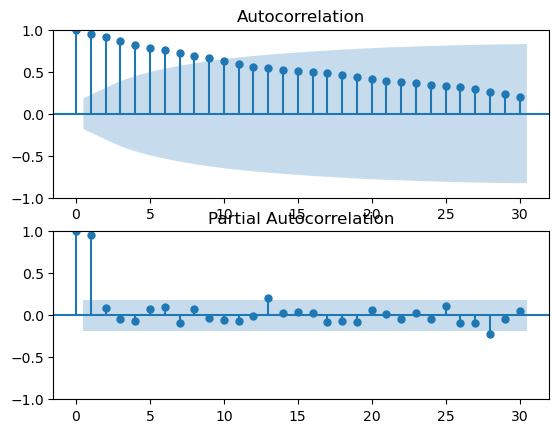

In [16]:
# ACF and PACF plots of time series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()
plt.subplot(211)
plot_acf(series, lags=30, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, lags=30, ax=plt.gca())
plt.show()

- The PACF shows a significant lag for perhaps 2 months.
- The ACF shows a significant lag for 5 days

This quick analysis suggests an ARIMA(5,1,2) on the raw data may be a good starting point. Experimentation shows that this configuration of ARIMA does not converge and results in errors by the underlying library, as do similarly large AR values. Some experimentation shows that the model does not appear to be stable, with non-zero AR and MA orders defined at the same time. The model can be simplified to ARIMA(0,1,2). The example below demonstrates the performance of this ARIMA model on the test harness.


In [17]:
from statsmodels.tsa.arima.model import ARIMA

#walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(valid)):
    # predict
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = valid[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))


>Predicted=18.791, Expected=19.875
>Predicted=19.695, Expected=23.333
>Predicted=22.871, Expected=24.462
>Predicted=24.402, Expected=23.750
>Predicted=23.825, Expected=20.500
>Predicted=20.835, Expected=19.125
>Predicted=19.316, Expected=19.750
>Predicted=19.779, Expected=20.000
>Predicted=19.970, Expected=22.625
>Predicted=22.431, Expected=21.545
>Predicted=21.511, Expected=20.786
>Predicted=20.889, Expected=19.938
>Predicted=20.046, Expected=18.533
>Predicted=18.673, Expected=17.375
>Predicted=17.484, Expected=17.444
>Predicted=17.478, Expected=18.000
>Predicted=17.972, Expected=19.875
>Predicted=19.758, Expected=24.000
>Predicted=23.969, Expected=20.900
>Predicted=20.827, Expected=24.692
>Predicted=24.233, Expected=24.667
>Predicted=24.753, Expected=23.333
>Predicted=23.476, Expected=25.000
>Predicted=24.807, Expected=27.250
>Predicted=27.013, Expected=28.000
>Predicted=27.934, Expected=28.917
>Predicted=28.857, Expected=26.500
>Predicted=26.724, Expected=29.100


In [18]:
# report performance
rmse = sqrt(mean_squared_error(valid, predictions))
print('RMSE: %.3f' % rmse)


RMSE: 2.024


#### 2. Grid Search ARIMA Hyperparameters

In [18]:
import warnings

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse


In [143]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [144]:
# evaluate parameters
p_values = range(0,13)
d_values = range(0, 4)
q_values = range(0, 13)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=8.585
ARIMA(0, 0, 1) RMSE=5.053
ARIMA(0, 0, 2) RMSE=3.951
ARIMA(0, 0, 3) RMSE=3.094
ARIMA(0, 0, 4) RMSE=2.730
ARIMA(0, 0, 5) RMSE=2.591
ARIMA(0, 0, 6) RMSE=2.353
ARIMA(0, 0, 7) RMSE=2.300
ARIMA(0, 0, 8) RMSE=2.300
ARIMA(0, 0, 9) RMSE=2.346
ARIMA(0, 0, 10) RMSE=2.330
ARIMA(0, 0, 11) RMSE=2.136
ARIMA(0, 0, 12) RMSE=2.188
ARIMA(0, 1, 0) RMSE=1.678
ARIMA(0, 1, 1) RMSE=1.687
ARIMA(0, 1, 2) RMSE=1.705
ARIMA(0, 1, 3) RMSE=1.733
ARIMA(0, 1, 4) RMSE=1.694
ARIMA(0, 1, 5) RMSE=1.748
ARIMA(0, 1, 6) RMSE=1.766
ARIMA(0, 1, 7) RMSE=1.775
ARIMA(0, 1, 8) RMSE=1.819
ARIMA(0, 1, 9) RMSE=1.825
ARIMA(0, 1, 10) RMSE=1.887
ARIMA(0, 1, 11) RMSE=1.935
ARIMA(0, 1, 12) RMSE=2.025
ARIMA(0, 2, 0) RMSE=2.474
ARIMA(0, 2, 1) RMSE=1.677
ARIMA(0, 2, 2) RMSE=1.683
ARIMA(0, 2, 3) RMSE=1.701
ARIMA(0, 2, 4) RMSE=1.727
ARIMA(0, 2, 5) RMSE=1.708
ARIMA(0, 2, 6) RMSE=1.722
ARIMA(0, 2, 7) RMSE=1.757
ARIMA(0, 2, 8) RMSE=1.726
ARIMA(0, 2, 9) RMSE=1.780
ARIMA(0, 2, 10) RMSE=1.808
ARIMA(0, 2, 11) RMSE=2.009
ARIM

The results show that the best configuration discovered was ARIMA(2,2,3).

#### 3. Review Residual Errors

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model

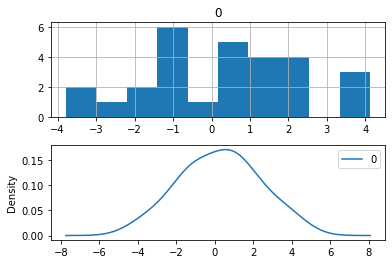

In [55]:
# plot residual errors for ARIMA model

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(valid)):
    # predict
    model = ARIMA(history, order=(2,2,3))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = valid[i]
    history.append(obs)

# errors
residuals = [valid[i]-predictions[i] for i in range(len(valid))]
residuals = pd.DataFrame(residuals)
plt.figure()
plt.subplot(211)
residuals.hist(ax=plt.gca())
plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()

<AxesSubplot:>

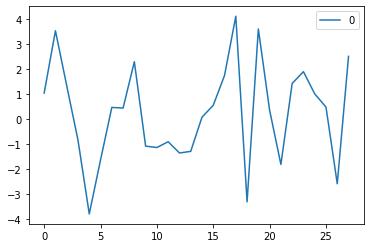

In [56]:
residuals.plot()

In [57]:
#checking for stationarity
ad_test(residuals)

1. ADF :  -5.043804780032571
2. P-Value :  1.8164265100457958e-05
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 27
5. Critical Values :
	 1% :  -3.6996079738860943
	 5% :  -2.9764303469999494
	 10% :  -2.627601001371742


The graphs suggests a Gaussian distribution. and Dickey Fuller Test shows that the residuals series is stationary so there are no trend and seasonality in our residuals time series.

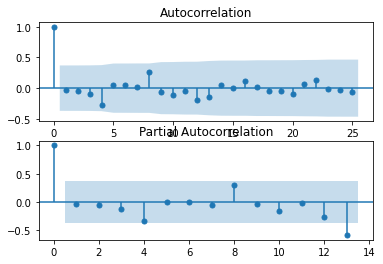

In [59]:
# ACF and PACF plots of forecast residual errors
plt.figure()
plt.subplot(211)
plot_acf(residuals, lags=25, ax=plt.gca())
plt.subplot(212)
plot_pacf(residuals, lags=13, ax=plt.gca())
plt.show()

In [60]:
residuals.describe()

,0
count,28.000000
mean,0.261214
std,2.032395
min,-3.790819
25%,-1.170880
50%,0.460745
75%,1.513653
max,4.124569


## Model Validation

#### 1. Finalize Model

In [61]:
import numpy as np

#fit model
model = ARIMA(X,order=(2,2,3))
model_fit = model.fit()
# bias constant, could be calculated from in-sample mean residual
bias = 0.261214
#save modelabs
model_fit.save('DailyDelhiClimateModel.pkl')
np.save('model_bias.npy', [bias])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### 2. Make Predictions

In [62]:
from statsmodels.tsa.arima.model import ARIMAResults

model_fit = ARIMAResults.load('DailyDelhiClimateModel.pkl')
bias = np.load('model_bias.npy')
yhat = bias + float(model_fit.forecast()[0])


In [63]:
print('Predicted: %.3f' %yhat)

Predicted: 32.833


#### 3. Model Validation

In [64]:
y = test
# make first prediction
predictions = list()
yhat = bias + float(model_fit.forecast()[0])
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))


>Predicted=32.833, Expected=29.500


In [65]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(2,2,3))
    model_fit = model.fit()
    yhat = bias + float(model_fit.forecast()[0])
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))


>Predicted=30.001, Expected=29.889


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=30.789, Expected=31.000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=31.156, Expected=29.286


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=29.752, Expected=30.625


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=31.438, Expected=31.375


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=31.350, Expected=29.750


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=30.417, Expected=30.500


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=31.078, Expected=30.933


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=30.889, Expected=29.231


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=30.192, Expected=31.222


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=31.368, Expected=27.000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=27.687, Expected=25.625


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=26.555, Expected=27.125


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=26.645, Expected=27.857


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=28.788, Expected=29.250


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=29.926, Expected=29.250


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=29.167, Expected=29.667


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=30.500, Expected=30.500


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=30.867, Expected=31.222


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=31.272, Expected=31.000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=31.964, Expected=32.556


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=32.604, Expected=34.000
>Predicted=34.220, Expected=33.500
>Predicted=34.532, Expected=34.500


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=34.353, Expected=34.250
>Predicted=34.807, Expected=32.900


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=33.800, Expected=32.875
>Predicted=32.619, Expected=32.000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 1.387


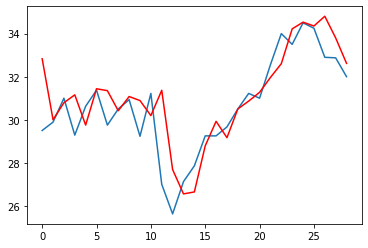

In [66]:
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
print('RMSE: %.3f' % rmse)
plt.plot(y)
plt.plot(predictions, color='red')
plt.show()
